Natalie Hall
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [108]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [110]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y
reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit model
model_1 = LinearRegression()
model_1. fit(X_train, y_train)

y_pred_train = model_1. predict(X_train)
y_pred_test = model_1. predict (X_test)

R2_train = model_1. score(X_train, y_train)
R2_test = model_1. score(X_test, y_test)

MSE_train = mean_squared_error (y_train, y_pred_train)
MSE_test= mean_squared_error (y_test, y_pred_test)

model_1.__dict__

print (coef)
print (bias)


[21.87990264 21.20699885 96.62079325  6.92937604 48.31504389]
-6.246569630870889


In [112]:
print("MSE (Train):", MSE_train)
print("MSE (Test):", MSE_test)
print("R² (Train):", R2_train)
print("R² (Test):", R2_test)

MSE (Train): 103.05216721474271
MSE (Test): 68.25326684387336
R² (Train): 0.9922649431299668
R² (Test): 0.995119907151996


#### Your written answers here

What are your model parameters?
 - Coefficients: 21.88, 21.21, 96.62, 6.93, 48.32
 - Incercept: -6.25

What were your MSE and R^2?
 - MSE: 68.25
 - R^2: 0.99
 



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [113]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')


True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


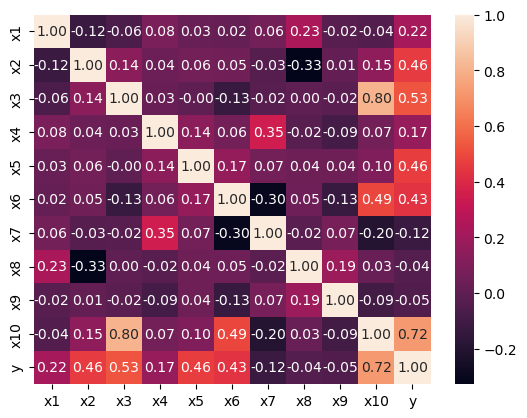

In [114]:
corr = reg2_df.corr()

sns.heatmap(corr, annot=True, fmt = '.2f')
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_model(model.intercept_, model.coef_, column_names, model_name = 'My Model')

print("MSE (Train):", MSE_train)
print("MSE (Test):", MSE_test)
print("R² (Train):", R2_train)
print("R² (Test):", R2_test)

My Model:
 y = -15.23 + 59.03*x1 + 79.07*x2 + 65.87*x3 + 12.91*x4 + 57.95*x5 + 51.22*x6 + -7.98*x7 + -1.98*x8 + 2.07*x9 + 60.01*x10
MSE (Train): 103.05216721474271
MSE (Test): 68.25326684387336
R² (Train): 0.9922649431299668
R² (Test): 0.995119907151996


#### Your written answers here

What are your model parameters?
 - 59.03*x1 + 79.07*x2 + 65.87*x3 + 12.91*x4 + 57.95*x5 + 51.22*x6 + -7.98*x7 + -1.98*x8 + 2.07*x9 + 60.01*x10 

Which features (x1, x2...) were significant? Which were co-linear?
 - x2, x3, x5, x6, x10 
 - x3 and x10, x6 and x10 
 
What were your MSE and R^2?
 - MSE: 68.25326684387336
 - R2: 0.6602748632519699



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [116]:
housing_df = pd.read_csv('kc_house_data.csv')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


r2 Score:0.5089


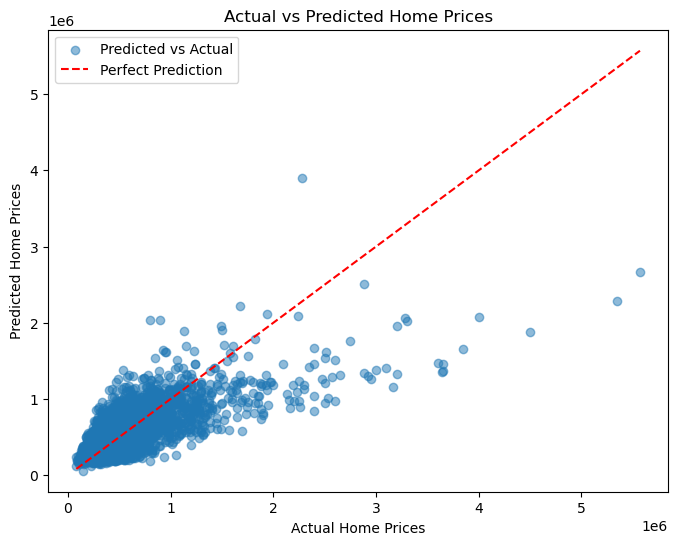

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

selected_features = ['sqft_living', 'bedrooms', 'bathrooms']
X = housing_df[selected_features]
y = housing_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(f'r2 Score:{r2:.4f}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color ='red',linestyle='dashed', label="Perfect Prediction")
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs Predicted Home Prices")
plt.legend()
plt.show()

In [118]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

In [119]:
from sklearn.linear_model import Lasso, Ridge 

# y = housing_df[['price']]
X = housing_df.drop(columns=['price'])



#### Your written answers here
Which features are you using and why?
 
- I am using sqft_living, bedrooms, bathrooms

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [120]:
from sklearn.linear_model import Lasso

housing_df = pd.read_csv('kc_house_data.csv')
X = housing_df.drop(columns = ['zipcode','date','id'], inplace=True)
y = housing_df[['price']]
X = housing_df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.transform(X_test)

model_lasso = Ridge(alpha=10000)
model_lasso.fit(X_scaled_train, y_train)

R2_train = model_lasso.score(X_scaled_train, y_train)
R2_test = model_lasso.score(X_scaled_test, y_test)

for k,(col,w) in enumerate(zip(X.columns,model_lasso.coef_)):
    print(f'{k}.\t{col}:\t{w:.2f}')
print_model(model_lasso.intercept_[0], model_lasso.coef_, list(X.columns), 'Lasso')

print(f'R2_train: {R2_train:0.2f}\n {R2_test:0.2f}')

0.	bedrooms:	-2668.71
1.	bathrooms:	28334.52
2.	sqft_living:	58365.95
3.	sqft_lot:	3786.40
4.	floors:	8998.96
5.	waterfront:	34669.62
6.	view:	36210.05
7.	condition:	16102.88
8.	grade:	67324.47
9.	sqft_above:	50605.36
10.	sqft_basement:	26214.12
11.	yr_built:	-32765.01
12.	yr_renovated:	15613.51
13.	lat:	56302.73
14.	long:	-16387.53
15.	sqft_living15:	39664.96
16.	sqft_lot15:	-2701.40
Lasso:
 y = 539943.66 + -2668.71*bedrooms + 28334.52*bathrooms + 58365.95*sqft_living + 3786.40*sqft_lot + 8998.96*floors + 34669.62*waterfront + 36210.05*view + 16102.88*condition + 67324.47*grade + 50605.36*sqft_above + 26214.12*sqft_basement + -32765.01*yr_built + 15613.51*yr_renovated + 56302.73*lat + -16387.53*long + 39664.96*sqft_living15 + -2701.40*sqft_lot15
R2_train: 0.66
 0.66


### Your written answers here
Which regression did you use?
 - Lasso

Does your regularized model look better than your MLR(partb)? How so?
 - Yes, the regularized model looks better than the MLR. It looks better because it reduces overfitting. 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

R² Score for homes < $1M: 0.3527
R² Score for homes > $1M: 0.3541
R² Score for homes < $1M: 0.3527
R² Score for homes > $1M: 0.3541


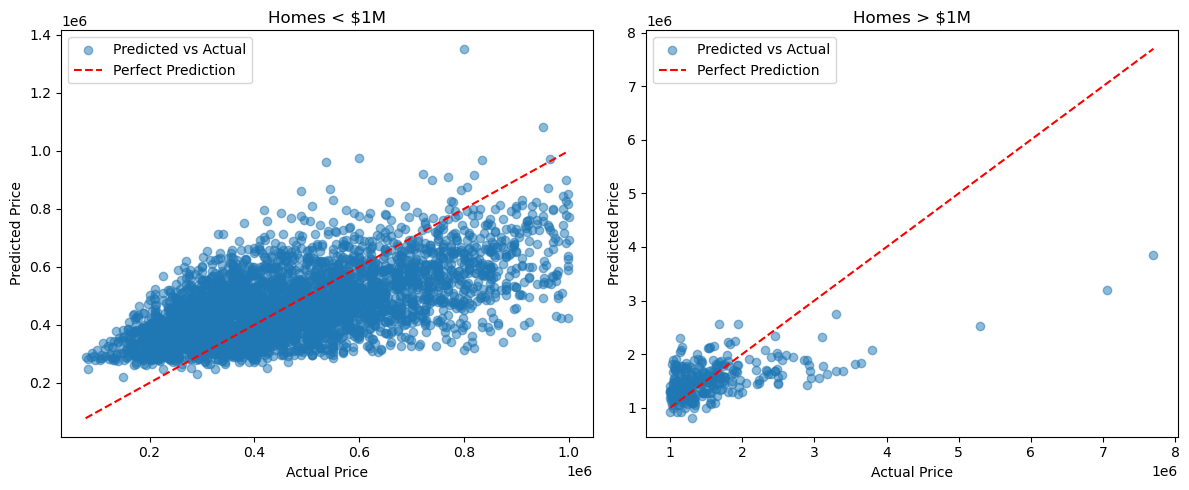

R² on the Testing Set (Lasso) - Below $1M: 0.3527
R² on the Testing Set (Lasso) - Above $1M: 0.3541
MSE on the Testing Set (Lasso) - Below $1M: 0.3527
MSE on the Testing Set (Lasso) - Above $1M: 0.3541


In [121]:
selected_features = ['sqft_living', 'bedrooms', 'bathrooms']
X = housing_df[selected_features]
y = housing_df['price']

below_1M = housing_df['price'] < 1_000_000
X_below, y_below = X[below_1M], y[below_1M]
X_above, y_above = X[~below_1M], y[~below_1M]

X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, test_size=0.2, random_state=42)
X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above, y_above, test_size=0.2, random_state=42)

scaler_below = StandardScaler()
X_train_below_scaled = scaler_below.fit_transform(X_train_below)
X_test_below_scaled = scaler_below.transform(X_test_below)

scaler_above = StandardScaler()
X_train_above_scaled = scaler_above.fit_transform(X_train_above)
X_test_above_scaled = scaler_above.transform(X_test_above)

ridge_below = Ridge(alpha=1.0)
ridge_above = Ridge(alpha=1.0)

ridge_below.fit(X_train_below_scaled, y_train_below)
ridge_above.fit(X_train_above_scaled, y_train_above)

y_pred_below = ridge_below.predict(X_test_below_scaled)
y_pred_above = ridge_above.predict(X_test_above_scaled)

r2_below = r2_score(y_test_below, y_pred_below)
r2_above = r2_score(y_test_above, y_pred_above)

print(f'R² Score for homes < $1M: {r2_below:.4f}')
print(f'R² Score for homes > $1M: {r2_above:.4f}')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].scatter(y_test_below, y_pred_below, alpha=0.5, label="Predicted vs Actual")
axes[0].plot([min(y_test_below), max(y_test_below)], [min(y_test_below), max(y_test_below)], color='red', linestyle='dashed', label="Perfect Prediction")
axes[0].set_title("Homes < $1M")
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")
axes[0].legend()

axes[1].scatter(y_test_above, y_pred_above, alpha=0.5, label="Predicted vs Actual")
axes[1].plot([min(y_test_above), max(y_test_above)], [min(y_test_above), max(y_test_above)], color='red', linestyle='dashed', label="Perfect Prediction")
axes[1].set_title("Homes > $1M")
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].legend()

print(f'R² Score for homes < $1M: {r2_below:.4f}')
print(f'R² Score for homes > $1M: {r2_above:.4f}')

plt.tight_layout()
plt.show()

print(f'R² on the Testing Set (Lasso) - Below $1M: {r2_below:.4f}')
print(f'R² on the Testing Set (Lasso) - Above $1M: {r2_above:.4f}')
print(f'MSE on the Testing Set (Lasso) - Below $1M: {r2_below:.4f}')
print(f'MSE on the Testing Set (Lasso) - Above $1M: {r2_above:.4f}')




 ### Your written answers here

 What are the $R^2$ for the two models?
- Below $1M: 0.3527
- Above $1M: 0.3541
 
